# Sentiment Analysis and Correlation

Importing Libraries

In [27]:
import pandas as pd
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


## Sentiment Analysis with TextBlob

**TextBlob** is a simple library built on top of NLTK.

For each sentence, it gives:

- **Polarity**: number between -1 (very negative) and +1 (very positive)  
- **Subjectivity**: number between 0 (very objective) and 1 (very subjective)

## Correlation

**Correlation** measures the strength and direction of a relationship between two numeric variables.

- Correlation coefficient **r** is between **-1 and 1**
- **r > 0** → positive relationship (when one increases, the other tends to increase)
- **r < 0** → negative relationship (when one increases, the other tends to decrease)
- **r ≈ 0** → no clear linear relationship

In [ ]:
def normalize_dates(df, date_col="date"):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce", utc=True)
    df = df.dropna(subset=[date_col])
    df["date_only"] = df[date_col].dt.date
    return df

def get_sentiment(text):
    if not isinstance(text, str):
        return 0.0, "neutral"
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        label = "positive"
    elif polarity < -0.05:
        label = "negative"
    else:
        label = "neutral"
    return polarity, label

def analyze_stock_news(news_path, stock_path, stock_date_col="Date", stock_close_col="Close"):
    """
    Given paths to a news CSV and a stock CSV, this function:
    1. Normalizes dates
    2. Computes sentiment for each headline
    3. Aggregates daily sentiment
    4. Computes daily stock returns
    5. Merges sentiment with returns
    6. Plots correlation heatmap
    Returns the merged dataframe and correlation value.
    """
    # Load datasets
    news_df = pd.read_csv(news_path)
    stock_df = pd.read_csv(stock_path)

    # Normalize dates
    news = normalize_dates(news_df, date_col="date")
    stocks = normalize_dates(stock_df, date_col=stock_date_col)

    # Align dates
    aligned = pd.merge(
        news,
        stocks[['date_only', stock_close_col]],
        on='date_only',
        how='inner'
    )

    # Sentiment analysis
    aligned["sentiment_score"], aligned["sentiment_label"] = zip(
        *aligned["headline"].apply(get_sentiment)
    )

    # Daily stock returns
    stocks["daily_return"] = stocks[stock_close_col].pct_change()
    stocks = stocks.dropna(subset=["daily_return"])

    # Aggregate sentiment per day
    daily_sentiment = (
        aligned.groupby("date_only")["sentiment_score"]
               .mean()
               .reset_index()
               .rename(columns={"sentiment_score": "avg_sentiment"})
    )

    # Merge sentiment and returns
    merged = pd.merge(
        daily_sentiment,
        stocks[["date_only", "daily_return"]],
        on="date_only",
        how="inner"
    )

    # Correlation
    corr_matrix = merged[["avg_sentiment", "daily_return"]].corr()
    corr_value = merged["avg_sentiment"].corr(merged["daily_return"])

    # Plot correlation heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation between Sentiment and Daily Returns")
    plt.show()

    return merged, corr_value



Processing AAPL_with_ticker.csv ...


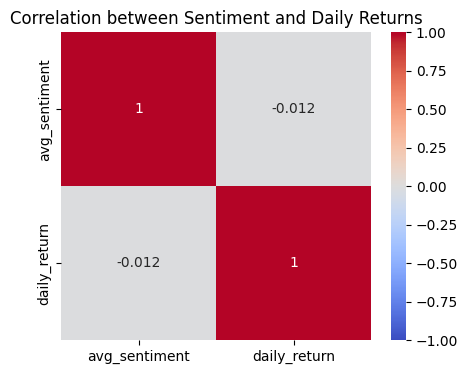

Correlation: -0.011685201808533212
    date_only  avg_sentiment  daily_return
0  2011-04-28       0.045455     -0.009710
1  2011-04-29       0.166667      0.009748
2  2011-05-02      -0.009259     -0.010997
3  2011-05-03       0.000000      0.005545
4  2011-05-05       0.000000     -0.008067

Processing AMZN_with_ticker.csv ...


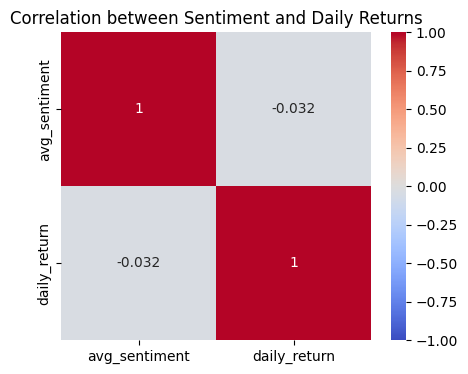

Correlation: -0.031560832806808894
    date_only  avg_sentiment  daily_return
0  2011-04-28       0.045455     -0.007934
1  2011-04-29       0.166667      0.003793
2  2011-05-02      -0.009259      0.027476
3  2011-05-03       0.000000     -0.013619
4  2011-05-05       0.000000     -0.014302

Processing GOOG_with_ticker.csv ...


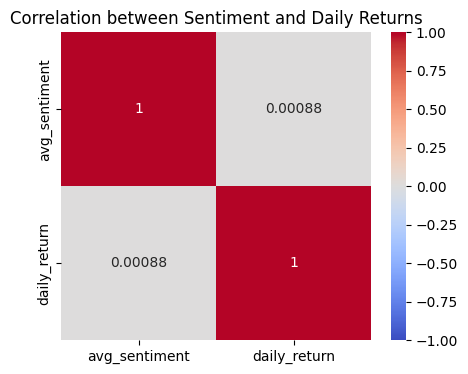

Correlation: 0.0008785522488798654
    date_only  avg_sentiment  daily_return
0  2011-04-28       0.045455      0.000390
1  2011-04-29       0.166667      0.011395
2  2011-05-02      -0.009259     -0.010182
3  2011-05-03       0.000000     -0.008671
4  2011-05-05       0.000000     -0.002837

Processing META_with_ticker.csv ...


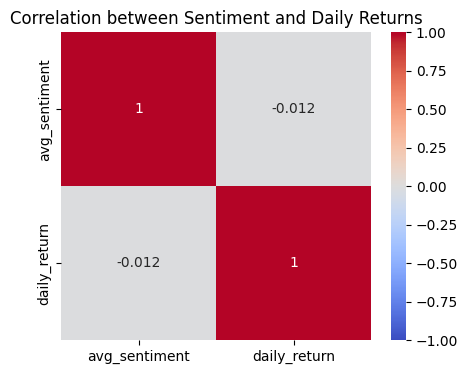

Correlation: -0.012160834794416583
    date_only  avg_sentiment  daily_return
0  2012-05-21       0.000000     -0.109861
1  2012-05-22       0.309524     -0.089039
2  2012-05-23       0.083333      0.032258
3  2012-05-24       0.000000      0.032187
4  2012-05-25       0.000000     -0.033909

Processing MSFT_with_ticker.csv ...


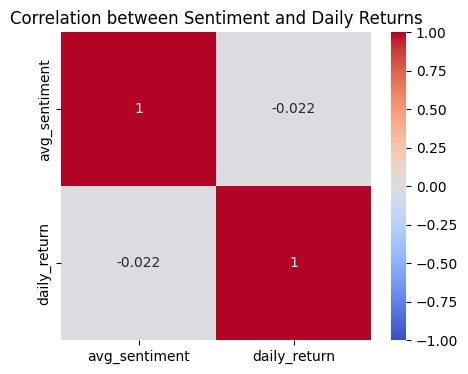

Correlation: -0.02160658536658295
    date_only  avg_sentiment  daily_return
0  2011-04-28       0.045455      0.012510
1  2011-04-29       0.166667     -0.029577
2  2011-05-02      -0.009259     -0.010030
3  2011-05-03       0.000000      0.005845
4  2011-05-05       0.000000     -0.010360

Processing NVDA_with_ticker.csv ...


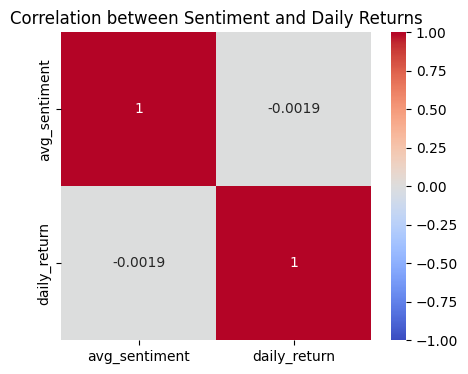

Correlation: -0.0019321066617360482
    date_only  avg_sentiment  daily_return
0  2011-04-28       0.045455      0.010881
1  2011-04-29       0.166667      0.025115
2  2011-05-02      -0.009259     -0.013500
3  2011-05-03       0.000000     -0.047643
4  2011-05-05       0.000000      0.000537


In [22]:
stocks_paths = [
    "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/AAPL_with_ticker.csv",
    "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/AMZN_with_ticker.csv",
    "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/GOOG_with_ticker.csv",
    "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/META_with_ticker.csv",
    "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/MSFT_with_ticker.csv",
    "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/Data/NVDA_with_ticker.csv"
]

news_path = "/Users/elbethelzewdie/Documents/stock-challenge-week1/stock-challenge-week1/data/cleaned_data.csv"

for stock_file in stocks_paths:
    print(f"\nProcessing {stock_file.split('/')[-1]} ...")
    merged_df, corr = analyze_stock_news(news_path, stock_file)
    print("Correlation:", corr)
    print(merged_df.head())


Observation

- **Highly positive sentences** → polarity close to +1  
- **Highly negative sentences** → polarity close to -1  
- **Neutral sentences** → polarity close to 0  

**Subjectivity** shows how opinion-based the sentence is  
(closer to 1 = more opinion, closer to 0 = more fact-like).